
## **6. E-Commerce Data ** 
https://www.kaggle.com/carrie1/ecommerce-data



----------------------------------------------------------------------

In [105]:
!pip install plotly
!pip install Lifetimes
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
palette = 'Set2'


**Loading Data**

In [107]:

df = pd.read_csv('/content/data 2.csv',
                 header = 0,
                 encoding = 'unicode_escape',
                 dtype = {'CustomerID': str,
                          'InvoiceID': str},
                 parse_dates = ['InvoiceDate'], 
                 infer_datetime_format = True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [108]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 0

total number of obseration is: 541909


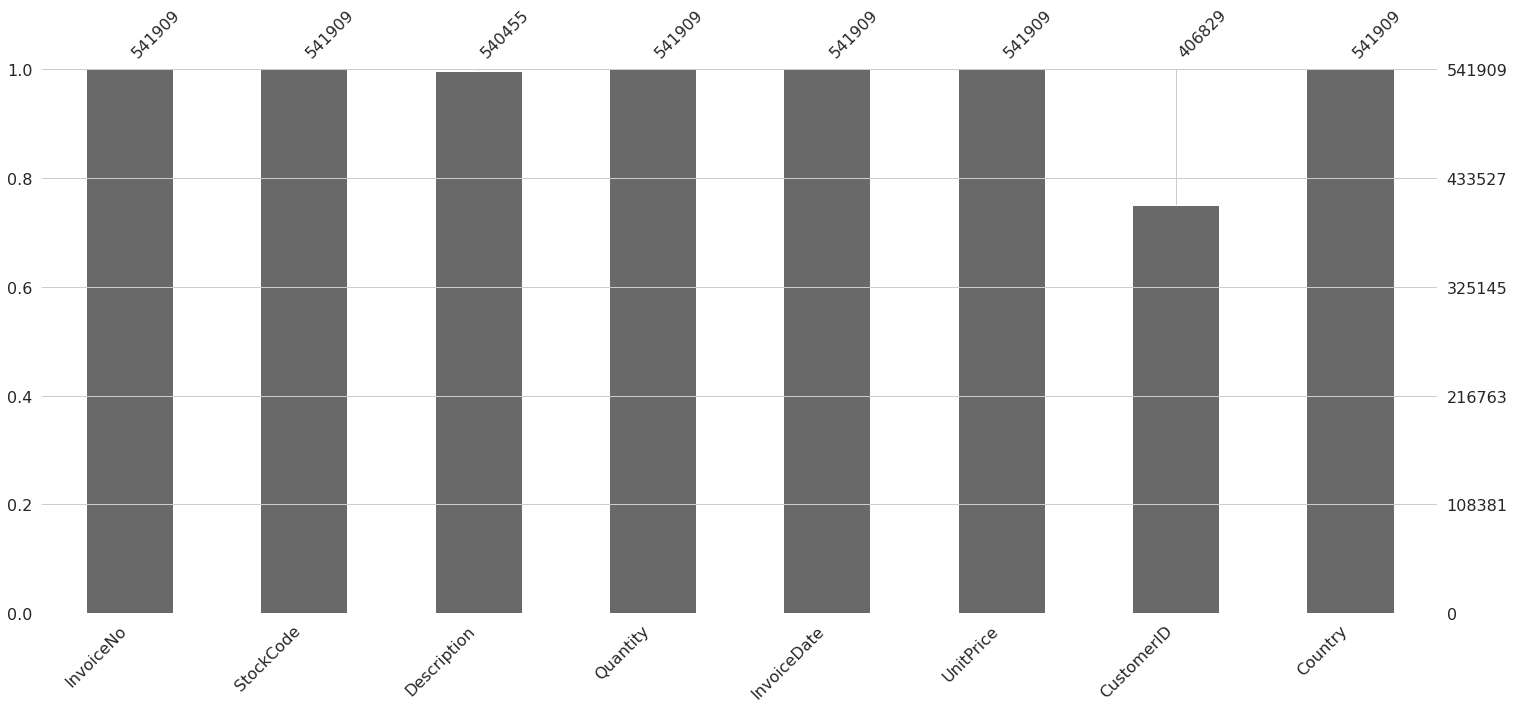

In [109]:

import missingno as msno
print ('total number of obseration is:',df.shape[0])
msno.bar(df)

In [110]:
df.dropna(inplace =True)

In [111]:
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)


In [112]:
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0] 

(0, 0)

In [113]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [114]:
df['TotalAmount']= df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
tm

,CustomerID,TotalAmount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


In [115]:
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


In [116]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
lt = df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346,United Kingdom,325
1,12347,Iceland,366
2,12348,Finland,357
3,12349,Italy,18
4,12350,Norway,309
...,...,...,...
4342,18280,United Kingdom,277
4343,18281,United Kingdom,180
4344,18282,United Kingdom,125
4345,18283,United Kingdom,336


In [117]:
merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
new_df=pd.merge(merge1,tm,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12346,United Kingdom,325,1,77183.60
1,12347,Iceland,366,182,4310.00
2,12348,Finland,357,31,1797.24
3,12349,Italy,18,73,1757.55
4,12350,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280,United Kingdom,277,10,180.60
4343,18281,United Kingdom,180,7,80.82
4344,18282,United Kingdom,125,12,178.05
4345,18283,United Kingdom,336,756,2094.88


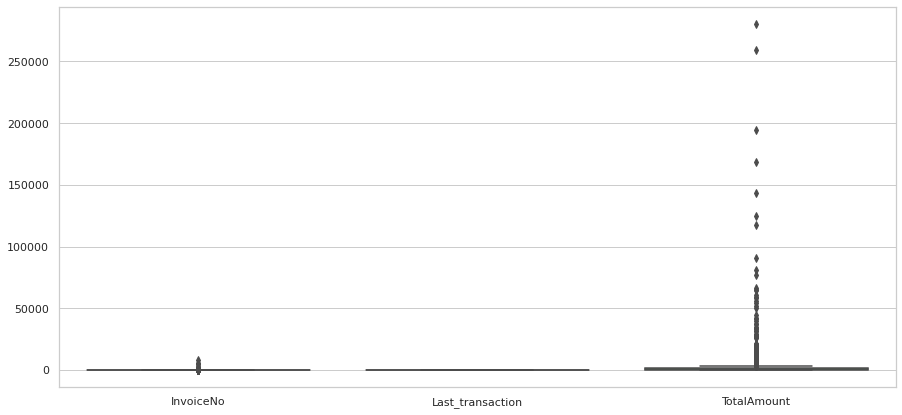

In [118]:
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','TotalAmount']])
plt.show()

In [119]:
IQR= new_df['TotalAmount'].quantile(0.75)-new_df['TotalAmount'].quantile(0.25)
lower_limit= new_df['TotalAmount'].quantile(0.25) - 1.5*IQR
upper_limit=new_df['TotalAmount'].quantile(0.75) + 1.5*IQR
k=new_df[new_df['TotalAmount']>upper_limit]
m=new_df[new_df['TotalAmount']<lower_limit]
df_iqr=new_df[(new_df['TotalAmount']<upper_limit) & (new_df['TotalAmount']>lower_limit)]
print('Data shape before removing outlier',new_df.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))

Data shape before removing outlier (4347, 5)
Data shape after removing outlier (3923, 5)
Total number of outlier: 424


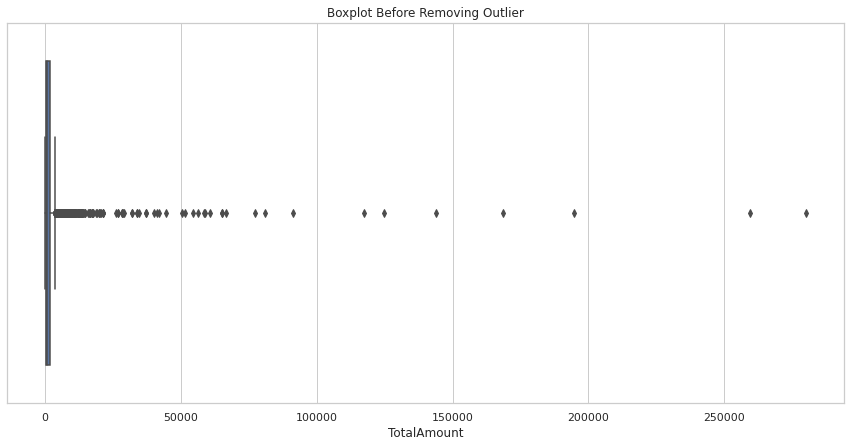

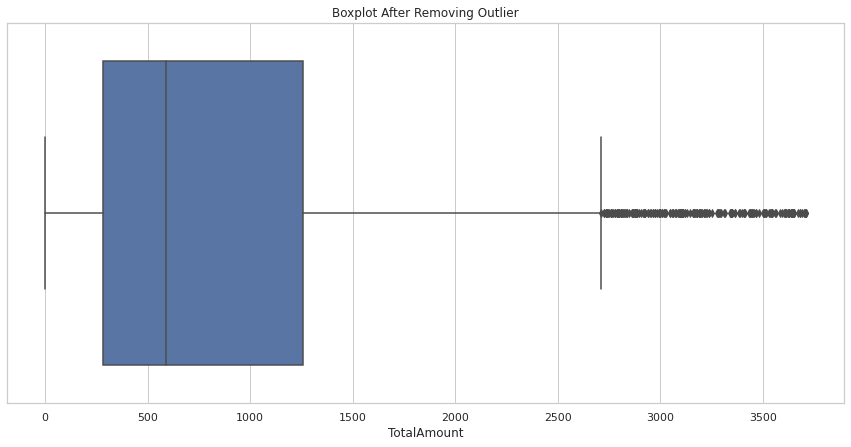

In [120]:
plt.figure(figsize=(15,7))
sns.boxplot(new_df['TotalAmount'])
plt.title('Boxplot Before Removing Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['TotalAmount'])
plt.title('Boxplot After Removing Outlier')
plt.show()

In [121]:
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12348,Finland,357,31,1797.24
1,12349,Italy,18,73,1757.55
2,12350,Norway,309,17,334.40
3,12352,Norway,296,85,2506.04
4,12353,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280,United Kingdom,277,10,180.60
3919,18281,United Kingdom,180,7,80.82
3920,18282,United Kingdom,125,12,178.05
3921,18283,United Kingdom,336,756,2094.88


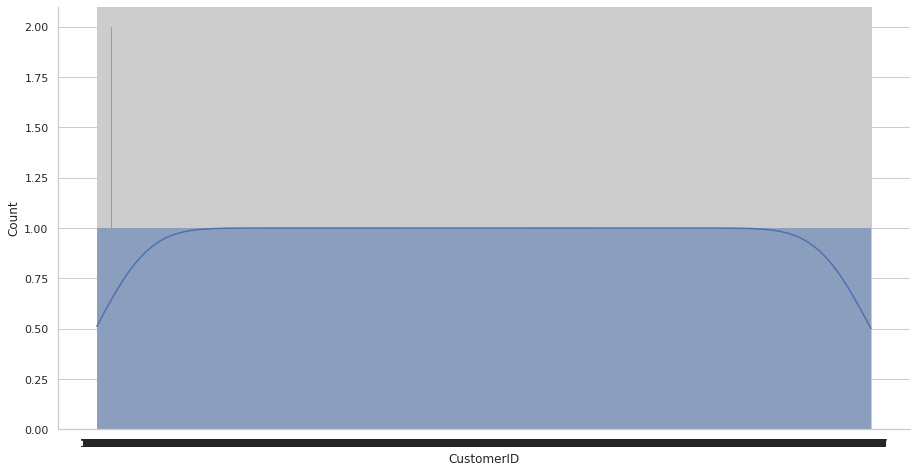

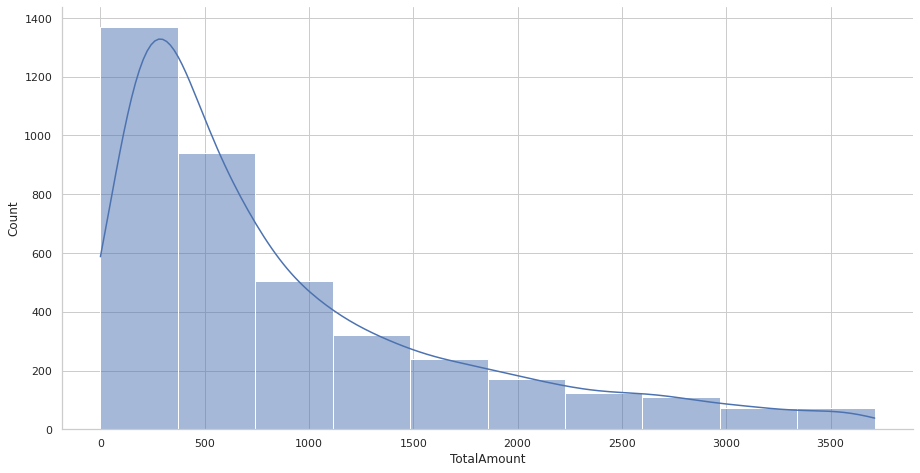

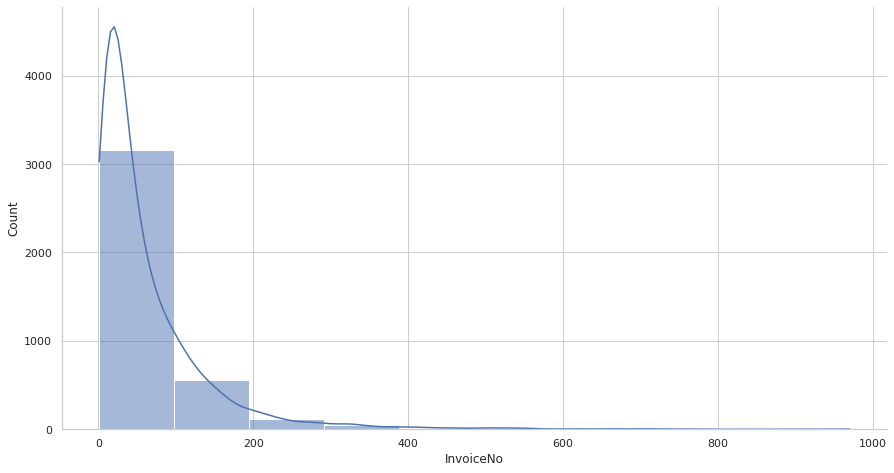

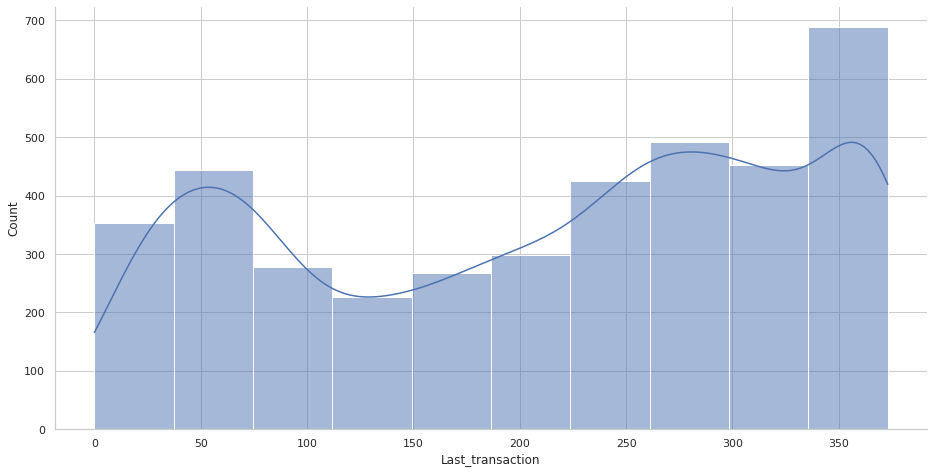

In [122]:
new1_df=df_iqr.copy()
df_num=['CustomerID','TotalAmount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

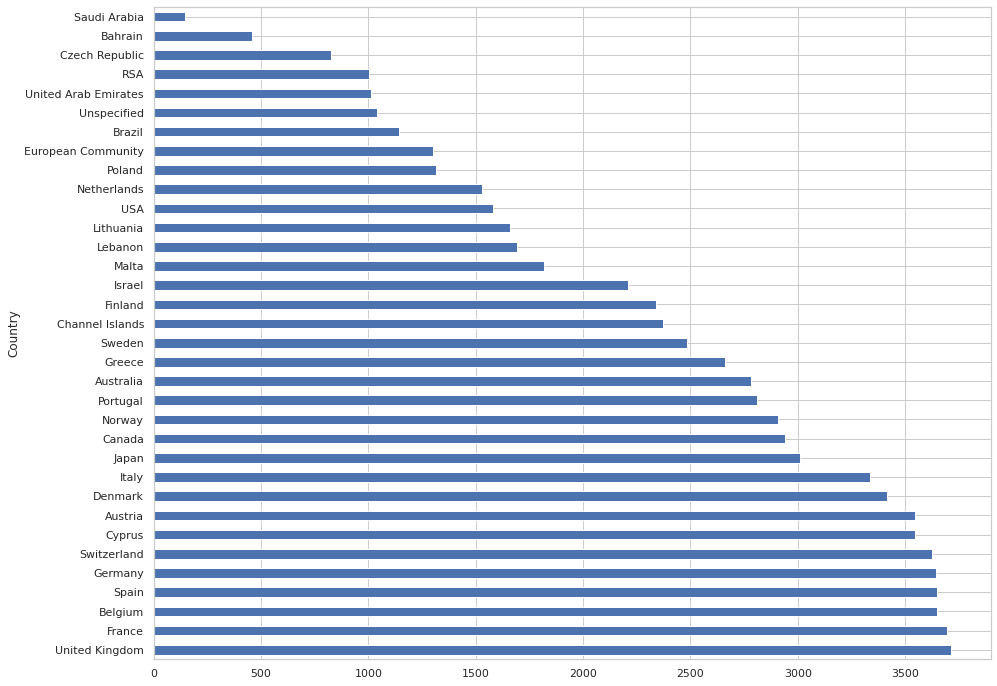

In [123]:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").TotalAmount.max().sort_values(ascending=False).plot.barh()
plt.show()

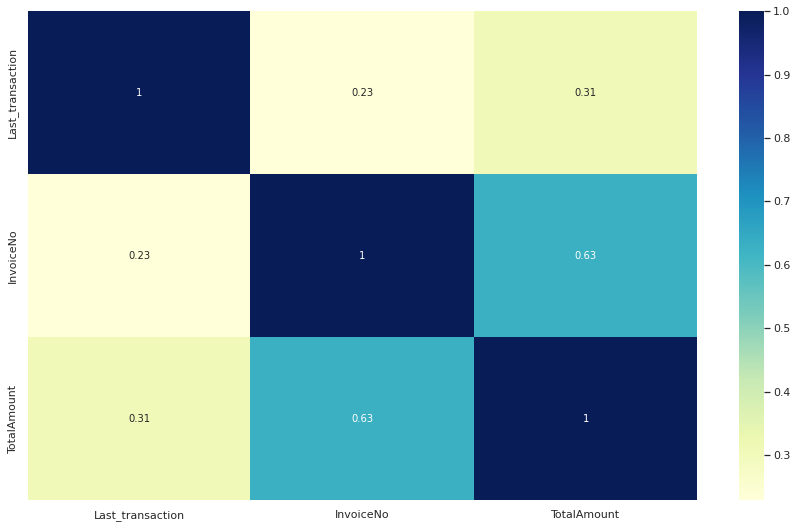

In [124]:
plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="YlGnBu", annot=True)
plt.show()

<Figure size 1080x576 with 0 Axes>

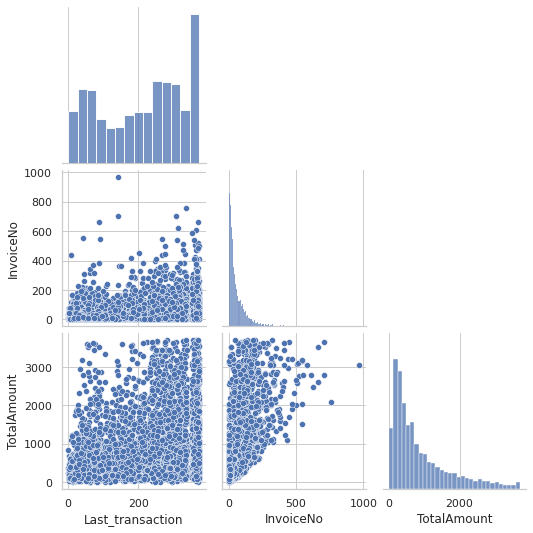

In [125]:
plt.figure(figsize=(15,8))
sns.pairplot(new1_df, corner=True)
plt.show()

**Top 5 Countries**

In [126]:



df['Country'].value_counts()[:5] 



United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

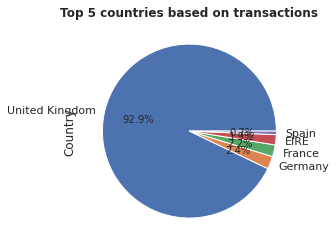

In [127]:
plt.figure()
df['Country'].value_counts()[:5].plot(kind = 'pie', autopct='%1.1f%%') #autopct -> shows the percentage
#plt.pie(df['Country'].value_counts()[:5], autopct='%1.1f%%')  #does the same thing but w/o the country labels
plt.title('Top 5 countries based on transactions', weight='bold') #makes the title bold
plt.show()

In [128]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Last_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373


**Machine Learning - Predicting Quantity**

In [129]:
   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**X, y, and train_test_split**

In [130]:


X = df[['UnitPrice','TotalAmount','CustomerID']]
y = df['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [131]:
df['Quantity'].mean() 

13.021823262733587

**LinearRegression**

In [132]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
pred_reg = linreg.predict(X_test)
score_linreg_per = linreg.score(X_test, y_test) * 100
print(f'Linear Regression Model Score: {score_linreg_per}%')

Linear Regression Model Score: 36.55261039583336%


In [133]:


val_mae_linreg = mean_absolute_error(pred_reg, y_test)
print(f'The quantity is off by: {val_mae_linreg} (MAE)') 

The quantity is off by: 7.751779525314018 (MAE)


In [134]:

cv_results_linreg = cross_val_score(linreg, X, y, cv=5) 
cv_results_linreg
np.mean(cv_results_linreg)

-0.016540502890340147

**Decision Tree Regressor**

In [135]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  10
Max leaf nodes: 25  		 Mean Absolute Error:  6
Max leaf nodes: 50  		 Mean Absolute Error:  3
Max leaf nodes: 100  		 Mean Absolute Error:  2
Max leaf nodes: 250  		 Mean Absolute Error:  1
Max leaf nodes: 500  		 Mean Absolute Error:  0


In [136]:
dtr = DecisionTreeRegressor(max_leaf_nodes=500) 

dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)
score_dtr_per = dtr.score(X_test, y_test) * 100
print(f'Decision Tree Regressor Model Score: {score_dtr_per}%')

Decision Tree Regressor Model Score: 96.11696774556448%


In [137]:
val_mae_dtr = mean_absolute_error(pred_dtr, y_test)
print(f'The quantity is off by: {val_mae_dtr} (MAE)')

The quantity is off by: 0.5052835439292743 (MAE)


In [138]:
cv_results_dtr = cross_val_score(dtr, X, y, cv=5) 
cv_results_dtr
np.mean(cv_results_dtr)

0.4338060622140093

**Random Forest Regressor**

In [139]:
rfg = RandomForestRegressor()

rfg.fit(X_train, y_train)
pred_rfg = rfg.predict(X_test)
score_rfg_per = rfg.score(X_test, y_test) * 100
print(f'Random Forest Regressor Model Score: {score_rfg_per}%')

Random Forest Regressor Model Score: 95.1254526152615%


In [140]:
val_mae_rfg = mean_absolute_error(pred_rfg, y_test)
print(f'The quantity is off by: {val_mae_rfg} (MAE)')

The quantity is off by: 0.13631142711149244 (MAE)


In [141]:

cv_results_rfg = cross_val_score(dtr, X, y, cv=5) 
cv_results_rfg
np.mean(cv_results_rfg)

0.4276509486339616

In [142]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Last_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373


In [143]:
data=df.copy()

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Last_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         397924 non-null  object        
 1   StockCode         397924 non-null  object        
 2   Description       397924 non-null  object        
 3   Quantity          397924 non-null  int64         
 4   InvoiceDate       397924 non-null  datetime64[ns]
 5   UnitPrice         397924 non-null  float64       
 6   CustomerID        397924 non-null  object        
 7   Country           397924 non-null  object        
 8   TotalAmount       397924 non-null  float64       
 9   Last_transaction  397924 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 41.5+ MB


In [145]:

data_all= df.copy()

data_all['amount']= data_all['Quantity']* data_all['UnitPrice']
data_all.head()

data_all['InvoiceDate']=pd.to_datetime(data_all['InvoiceDate'])

analysis_date = pd.to_datetime(data_all['InvoiceDate'].max())+ dt.timedelta(days=1)
data_all.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Last_transaction,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373,20.34


**R,F,M Values**

In [146]:

grouped = data_all.groupby(['CustomerID'])\
                .agg({'InvoiceDate': lambda x: (analysis_date - x.max()).days,
                      'InvoiceNo': 'count',
                      'amount': 'sum'})\


grouped.rename(columns = {'InvoiceDate': 'R_val',
                                   'InvoiceNo': 'F_val',
                                   'amount': 'M_val'}, inplace=True)
grouped.reset_index().head()

,CustomerID,R_val,F_val,M_val
0,12346,326,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40


In [147]:
#divide recency metric into 4 quartiles
r_quartiles = pd.qcut(grouped['R_val'], 4, labels = range(4, 0, -1))
grouped = grouped.assign(R_quartile = r_quartiles.values.astype('int'))

#divide frequency metric into 4 quartiles
f_quartiles = pd.qcut(grouped['F_val'], 4, labels = range(1, 5, 1))
grouped = grouped.assign(F_quartile = f_quartiles.values.astype('int'))

#divide monetary metric into 4 quartiles
m_quartiles = pd.qcut(grouped['M_val'], 4, labels = range(1, 5, 1))
grouped = grouped.assign(M_quartile = m_quartiles.values.astype('int'))

grouped.head()

,R_val,F_val,M_val,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,19,73,1757.55,3,3,4
12350,310,17,334.40,1,1,2


In [148]:
grouped['RFM_Seg']=grouped['R_quartile'].astype('str') + grouped['F_quartile'].astype('str') + grouped['M_quartile'].astype('str')

grouped['RFM_Score']= grouped[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
grouped.head()

,R_val,F_val,M_val,R_quartile,F_quartile,M_quartile,RFM_Seg,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,19,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4


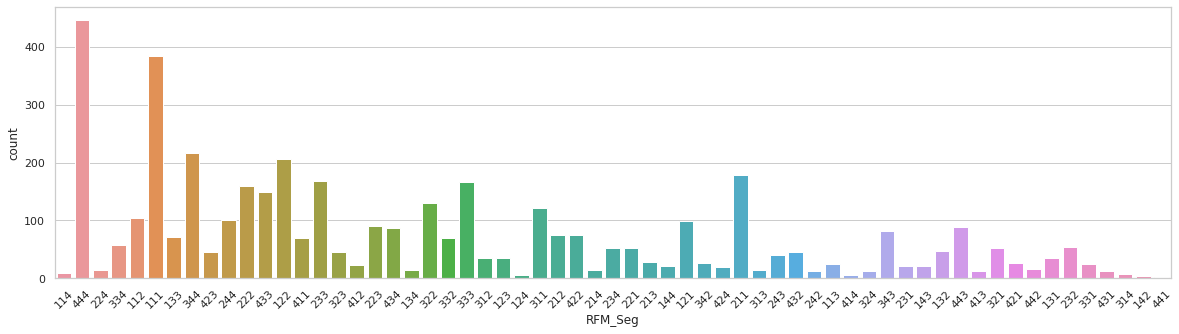

In [149]:
sns.set_theme(style="whitegrid")

#set plot size
fig, ax = plt.subplots(figsize=(20, 5))

sns.countplot(x="RFM_Seg", data=grouped)
plt.xticks(rotation=45)

plt.show()

In [150]:
def get_tier(a):
    if a >9:
        return 'Platinum'
    elif (a>6) & (a<=9):
        return 'Gold'
    elif (a>3) & (a<=6):
        return 'Advanced'
    elif (a>0) & (a<=3):
        return 'Basic' 

grouped['Tier']=grouped['RFM_Score'].apply(get_tier)
grouped.head()

,R_val,F_val,M_val,R_quartile,F_quartile,M_quartile,RFM_Seg,RFM_Score,Tier
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6,Advanced
12347,2,182,4310.00,4,4,4,444,12,Platinum
12348,75,31,1797.24,2,2,4,224,8,Gold
12349,19,73,1757.55,3,3,4,334,10,Platinum
12350,310,17,334.40,1,1,2,112,4,Advanced


In [151]:
df_reset= grouped.reset_index()
tier_analysis=df_reset.groupby(['Tier'])\
        .agg({'R_val': 'mean',
                      'F_val': 'mean',
                      'M_val': 'mean'}).round(2)
print(tier_analysis,'\n')
print(grouped['Tier'].value_counts())

           R_val   F_val    M_val
Tier                             
Advanced  140.67   21.42   486.59
Basic     260.76    8.21   158.92
Gold       63.76   57.76  1164.86
Platinum   19.92  228.31  5248.51 

Advanced    1360
Gold        1330
Platinum    1265
Basic        384
Name: Tier, dtype: int64


In [152]:

country_count=data_all.groupby(['Country']).size().to_frame('Total_Customers_in_country').reset_index()
country_count.head()

df_with_country = df_reset.merge(data_all[['CustomerID','Country']], how='inner', on='CustomerID')
result= df_with_country.groupby(['Tier','Country']).size().to_frame('Customer_count').reset_index()
country_data= result.merge(country_count, how='inner', on='Country')

basic_tier= country_data[country_data['Tier'].isin(['Basic'])]

basic_tier['Basic_Tier_Percentage']= ((basic_tier['Customer_count']/basic_tier['Total_Customers_in_country'])*100)\
                                           .round(3)

basic_tier[['Country', 'Basic_Tier_Percentage']].sort_values('Basic_Tier_Percentage', ascending=False).head()

,Country,Basic_Tier_Percentage
85,Saudi Arabia,100.000
8,Bahrain,23.529
15,Canada,6.623
21,Cyprus,1.954
10,Belgium,1.280


In [153]:

platinum_tier= country_data[country_data['Tier'].isin(['Platinum'])]


platinum_tier['Platinum_Tier_Percentage']= ((platinum_tier['Customer_count']/platinum_tier['Total_Customers_in_country'])*100)\
                                            .round(3)

platinum_tier[['Country','Platinum_Tier_Percentage']].sort_values('Platinum_Tier_Percentage', ascending=False).head()

,Country,Platinum_Tier_Percentage
95,Singapore,100.000
94,Iceland,100.000
88,EIRE,97.776
56,Norway,90.951
53,Netherlands,90.817


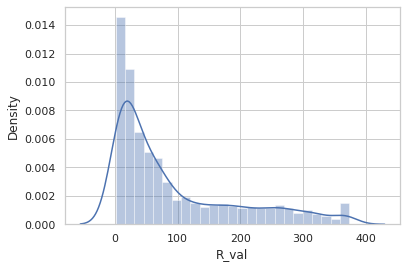

In [154]:

sns.distplot(grouped['R_val'])

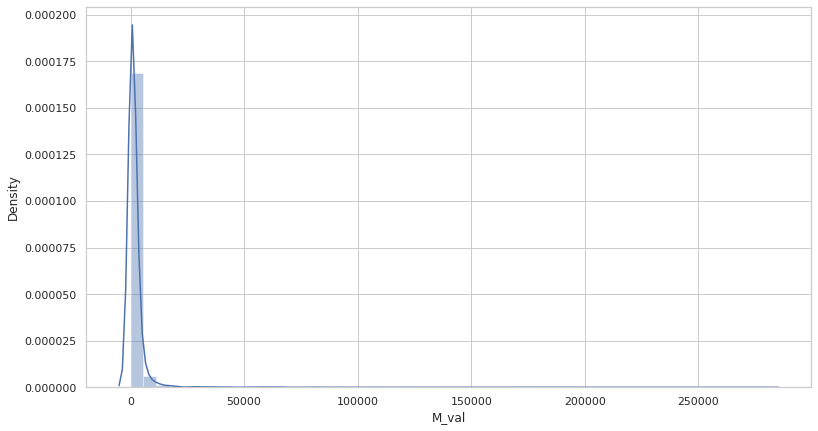

In [155]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.distplot(grouped['M_val'])

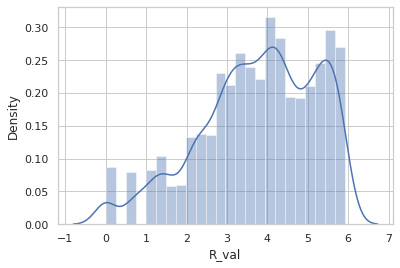

In [156]:
recency_log= np.log(grouped['R_val'])


sns.distplot(recency_log)
plt.show()

In [157]:

grouped.describe()

,R_val,F_val,M_val,R_quartile,F_quartile,M_quartile,RFM_Score
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,91.708689,2053.793018,2.514174,2.490897,2.499885,7.504955
std,100.009747,228.792852,8988.248381,1.126392,1.122139,1.118266,2.816529
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,18.000000,17.000000,307.245000,2.000000,1.000000,1.500000,5.000000
50%,51.000000,41.000000,674.450000,3.000000,2.000000,2.000000,7.000000
75%,142.000000,100.000000,1661.640000,4.000000,3.000000,3.500000,10.000000
max,374.000000,7847.000000,280206.020000,4.000000,4.000000,4.000000,12.000000


In [158]:
rfm = grouped[['R_val','F_val','M_val']]

rfm['M_val']=rfm['M_val']+1

for c in ['R_val', 'F_val']:
    rfm[c]= np.log(rfm[c])
    

from sklearn.preprocessing import StandardScaler

ecomm_standardized= StandardScaler().fit_transform(rfm)
rfm[['R_val','F_val','M_val']]=ecomm_standardized.round(2)

rfm.head()

,R_val,F_val,M_val
CustomerID,,,
12346,1.41,-2.77,8.36
12347,-2.15,1.15,0.25
12348,0.38,-0.18,-0.03
12349,-0.57,0.46,-0.03
12350,1.37,-0.64,-0.19


**K-Means**

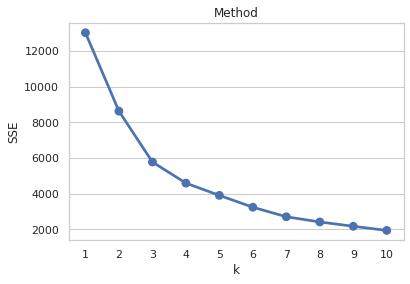

In [159]:
# k-means clusterig
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=1)    
    kmeans.fit(rfm)    
    sse[k] = kmeans.inertia_ 
     
plt.title('Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [160]:
kmeans = KMeans(n_clusters=3, random_state=1)    
kmeans.fit(rfm)

cluster_table = grouped.assign(Cluster=kmeans.labels_)

clustered_data = cluster_table.groupby(['Cluster'])

clustered_data.agg({
    'R_val': 'mean',
    'F_val': 'mean',
    'M_val': 'mean'
  }).round(2)

,R_val,F_val,M_val
Cluster,,,
0,6.25,1450.88,172508.53
1,147.07,27.76,660.08
2,22.37,168.62,3133.63


KNN

In [161]:
customer = pd.read_csv("/content/data 2.csv",encoding = 'unicode_escape')
print(customer)
customer.head()

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [162]:
customer.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [163]:
customer.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,12/9/2011 12:49,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/2011 12:50,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/2011 12:50,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680.0,France


In [164]:
customer.dropna(how='any',inplace=True)
customer.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [165]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

In [166]:
def LabelEncoding(data, columnNames):
    for column in columnNames:
        data[column]=le.fit_transform(data[column])

In [167]:
LabelEncoding(customer, ['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

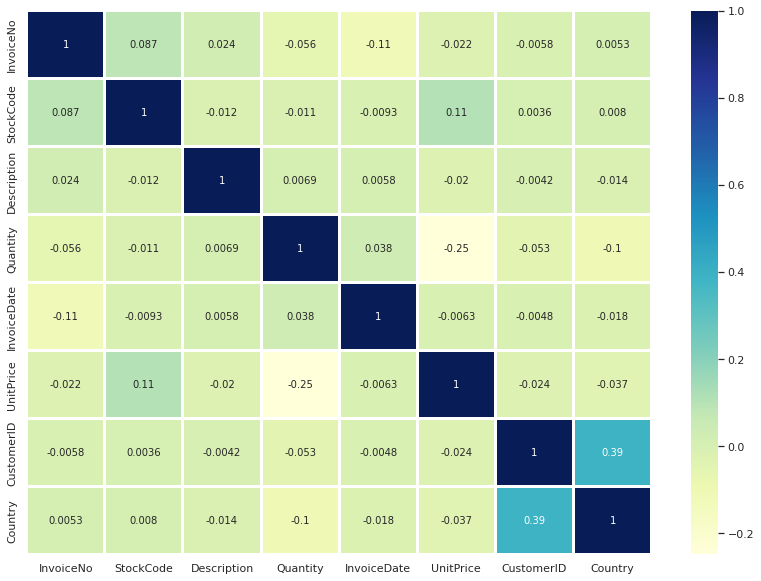

In [169]:
plt.figure(figsize=(14,10))
sns.heatmap(customer.corr(), annot=True,cmap='YlGnBu',linewidths=2)

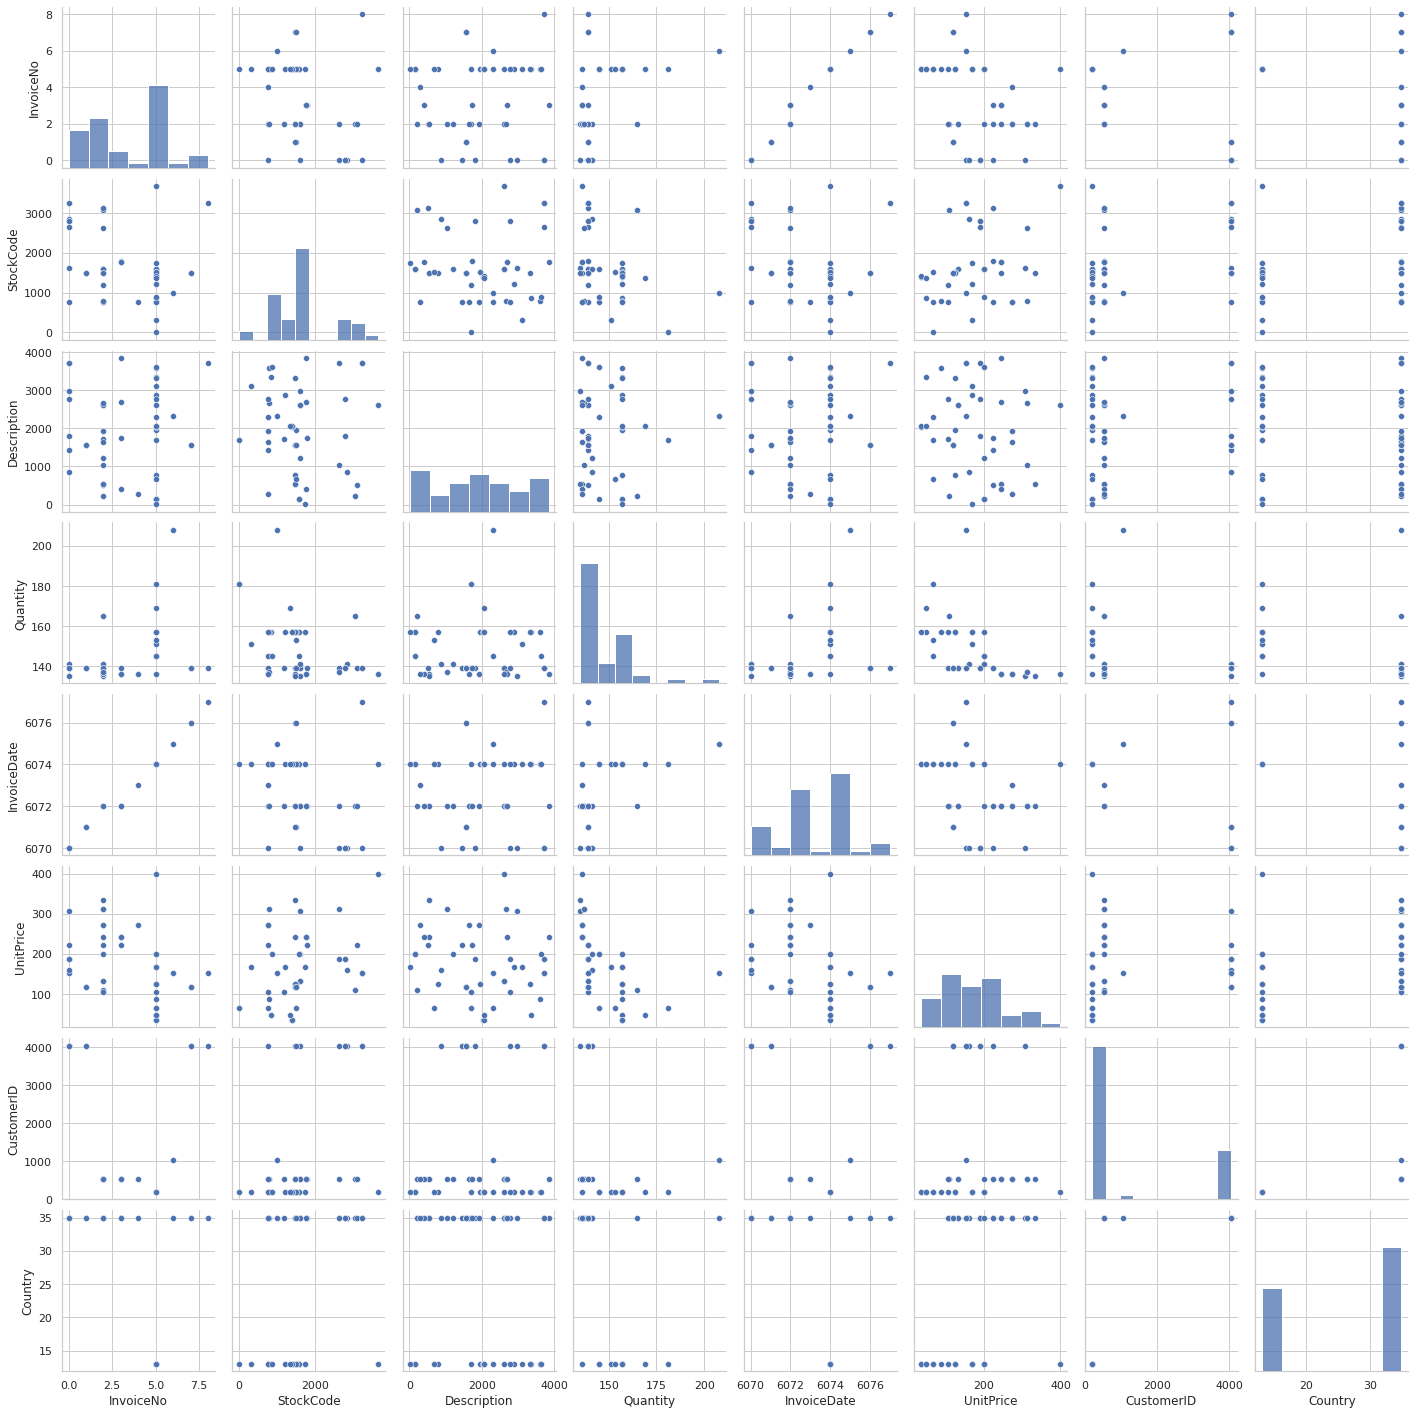

In [170]:
sns.pairplot(customer.head(50))

In [171]:
X = customer[['Quantity']]
y = customer['CustomerID']

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [176]:
y_pred = classifier.predict(X_test)

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        14
          10       0.00      0.38      0.00        26
          11       0.00      0.00      0.00         5
          12       0.00      0.18      0.00        50
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00        53
          17   

In [178]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

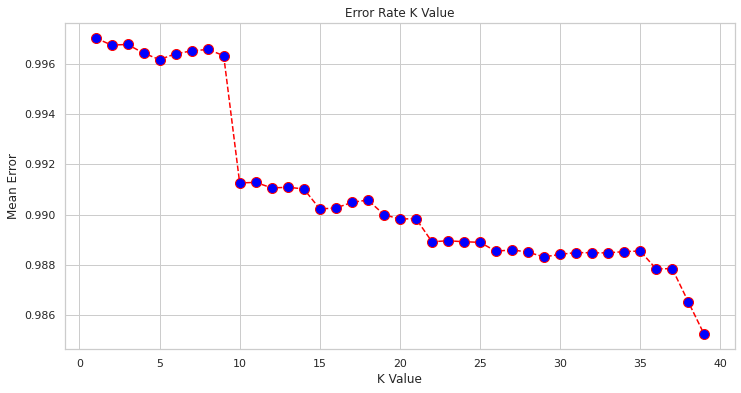

In [179]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [180]:
data = pd.read_csv("/content/data 2.csv",encoding = 'unicode_escape')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [181]:
data.dropna(how='any',inplace=True)

In [182]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [183]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

In [184]:
def LabelEncoding(data, columnNames):
    for column in columnNames:
        data[column]=le.fit_transform(data[column])

In [185]:
LabelEncoding(data, ['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])

In [186]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,139,6070,153,4048,35
1,0,2649,3724,139,6070,188,4048,35
2,0,2855,861,141,6070,161,4048,35
3,0,2803,1813,139,6070,188,4048,35
4,0,2802,2776,139,6070,188,4048,35
...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,145,8338,65,275,13
541905,18535,1746,695,139,8338,132,275,13
541906,18535,2086,701,137,8338,221,275,13
541907,18535,2087,700,137,8338,221,275,13


In [187]:
from sklearn.model_selection import train_test_split
X = data.drop(['CustomerID'], axis = 1)
y = data.CustomerID.values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [189]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=15, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

model.add(Dense(units = 32, activation = 'relu'))
model.compile(loss = 'binary_encoding', optimizer='adam', metrics=['accuracy'])

**NaiveBayes Classifier**

In [190]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,Y_train)

y_pred= model.predict(X_test)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[40  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         5
           5       0.60      0.27      0.37        11
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       0.83      0.31      0.45        16
          10       1.00      1.00      1.00        30
          11       0.50      0.20      0.29         5
          12       0.53      1.00      0.69        50
          13       0.69      0.81      0.75        31
          14       1.00      0.50      0.67         2
          15       0.23      0.38      0.28        64
          16       0.67      0.60